# Assignment #1
### Exploratory Data Analysis

#### In this assignment, we will investigate relationships in covid severity using bulk RNA-seq data.

The data we will look at is from a large scale multi-omic analysis of COVID severity published in early 2021. This means that this dataset used many -omics techniologies (transcriptomics, proteomics, metabolomics, etc.) to investigate biomarkers associated with COVID-19 status and severity. For this assignment, we're specifically going to look at RNA-seq data collected from plasma and leukocyte samples.

In this assignment, we'll do an exploratory data analysis to try to find some interesting biological conclusions about how gene expression in cells change in response to COVID19!

Read the paper to learn more about the study [here](https://www.sciencedirect.com/science/article/pii/S2405471220303719?via%3Dihub#appsec2). The data is located [here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE157103) (data is already included in the zip file, so don't worry about downloading it from there).


#### First, let's load in our packages

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns

In [520]:
# You may need to edit this line if you can't load the dataset
# os.chdir('/Users/vishal/Documents/TA_Class/assignments/Assignment1/')

#### And then, our data

In [521]:
# First, we load our RNA counts table
counts=pd.read_table('./GSE157103_genes.tpm.tsv', sep='\t')
# Next, let's do some preprocessing for convenience
counts = counts.rename(columns={'#symbol': 'sampleID'})
counts = counts.set_index('sampleID').T
# Now, let's look at the first 5 rows
counts.head()

sampleID,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,4.07,0.0,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
C2,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,3.00,0.0,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
C3,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,1.83,0.0,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
C4,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,4.22,0.0,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
C5,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,1.17,0.0,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [522]:
len(counts.columns)

19472

In [523]:
# Next, we can load our metadata file
# This will contain various characteristics about each sample
metadata = pd.read_table('./GSE157103_metadata.csv', sep=',')
# Now, some preprocessing
del metadata['Unnamed: 0']
metadata = metadata.set_index('sampleID')
metadata['age'][metadata['age'] == ':'] = np.nan
metadata['age'] = metadata['age'].astype('float')
# And now let's look at the first 5 rows
metadata.head()

C:\Users\user\AppData\Local\Temp\ipykernel_32644\155019827.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  metadata['age'][metadata['age'] == ':'] = np.nan


,age,sex,hospital,covid
sampleID,,,,
C1,39.0,male,NonICU,COVID
C2,63.0,male,NonICU,COVID
C3,33.0,male,NonICU,COVID
C4,49.0,male,NonICU,COVID
C5,49.0,male,NonICU,COVID


## 1: Preprocessing

First, we're going to take a look at our dataset and get it ready for our analysis.

#### a) Overview of the Data

1. Read a little about the study and the dataset. What kind of tissue is our data from? What information does the `counts` dataframe contain? What information does the `metadata` dataframe contain? What do the rows and columns represent in each of these dataframes?

*ANSWER HERE*:<br>
a. Our data comes from 128 of blood samples of COVID-19-positive and COVID-19-negative patients.<br>
b.'counts' dataframe contains samplesID which represent each patients. And the first row represent genes name. The value express TPM (Trainscript per Million) value.<br>
c. 'Metadata' dataframe contains details information of each patient including their age, sex, hospital(NonICU/ICU), and covid(COVID/NONCOVID)<br>
d. The rows and columns in 'counts' represent sampleID and genes name with TPM value.; The rows and columns in 'metadata' represent different feature and  each sampleID's detail infomation.

2. How many samples do we have? How many genes?

*ANSWER HERE*: 126 samples, 19472 genes

#### b) Filtering Data
1. When we do RNA-seq analysis, we end up with a lot of genes that have very low expression and need to be filtered out. Filter the `counts` dataframe to only contain genes that have non-zero expression in at least 10% of samples. In other words, if a gene has an expression of zero in more than 12 samples, remove that gene.

In [524]:
# Filter genes here
counts_zero = (counts == 0).sum(axis=0) # Count the number of zeros in each column
filter = counts.loc[:, counts_zero <= 12] # select columns where the count of zeros is less than 12
filter

sampleID,A1BG,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C1,0.49,0.21,18.92,4.07,22.93,7.12,17.19,61.08,0.31,21.59,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
C2,0.29,0.14,18.68,3.00,21.69,6.46,13.06,54.54,0.00,19.22,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
C3,0.26,0.03,13.85,1.83,18.27,3.92,13.35,25.19,0.65,8.72,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
C4,0.45,0.09,22.11,4.22,26.69,8.74,17.53,67.95,0.08,20.83,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
C5,0.17,0.00,8.45,1.17,17.02,7.26,10.14,18.29,1.02,7.46,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC22,0.30,0.02,17.06,1.96,7.48,2.02,15.45,33.97,0.07,7.81,...,0.26,1.01,0.13,0.46,5.93,0.24,1.58,447.14,3.04,1.00
NC23,0.70,0.02,20.31,1.54,10.35,2.94,16.58,50.65,1.09,10.34,...,0.64,0.83,0.18,0.73,8.75,0.12,1.57,748.55,4.55,1.56
NC24,0.75,0.27,27.25,3.42,14.06,6.32,17.11,62.11,0.16,15.42,...,1.18,2.14,0.41,1.29,14.93,0.14,5.05,437.62,10.34,3.99
NC25,2.80,0.04,21.64,1.43,9.49,2.68,24.82,35.72,0.20,9.07,...,0.42,0.61,0.19,0.45,4.77,0.33,1.07,369.66,1.83,0.96


2. How many genes did we filter out?

In [525]:
filterout = counts.loc[:, counts_zero > 12] # select columns where the count of zeros is greater than 12
len(filterout.columns)

5953

*ANSWER HERE*: 5953 was filtered out

**NOTE: Use this filtered dataset for the remaining analysis.**

#### c) Data Normalization

1. This data is already normalized for us. How has the data been normalized? (hint, look at the filenames).

It is normalized by transcripts per million(TPM) methods. 

2. Sum up the transcripts for each sample in the data. What do these numbers add up to? How does this confirm our answer from the previous question?

In [526]:
# Sum transcripts here
sum = filter.sum(axis=1)
sum 

C1      999122.30
C2      999132.54
C3      999452.14
C4      998885.40
C5      999456.55
          ...    
NC22    999089.32
NC23    999601.71
NC24    999537.95
NC25    998639.90
NC26    999469.00
Length: 126, dtype: float64

*ANSWER HERE*: The numbers will add up  to nearly 1 million, which is the purpose of TPM.

3. Why are each of these sample sums slightly different from what we would expect?

*ANSWER HERE*: It is due to we have filter out those low-expression genes.

## 2: Principal Component Analysis

Our data is so big! There are tens of thousands of features! In order to visualize our data, we'll use PCA for dimensionality reduction. This will allow us to explore trends in our data.

#### a) Perform Principal Component Analysis
1. Perform principal component analysis over samples (use code from class or a package like scikit-learn). Print the first few rows of your computed PCs. What do the rows represent in this matrix? What do the columns represent?

In [527]:
# DO PCA HERE
def our_pca(X,center=True):
    if center:
        X = X.apply(lambda x: x-x.mean()) # mean-centered 
    U,sigma,Vt = np.linalg.svd(X,full_matrices=False) # singular value decomposition X=U,sigma,v dot 
    PCs = U.dot(np.diag(sigma)) # loading dot producted  # (np.diag(sigma)):make matrix on diagno 
    PVE = sigma**2/(sigma**2).sum()  
    return PCs, Vt, PVE, U

In [528]:
PCs, Vt, PVE, U = our_pca(filter.T)

In [529]:
# PRINT FIRST FEW ROWS OF PCs
df_PCs = pd.DataFrame(PCs)
df_PCs.columns = ['PC%d'%(i+1) for i in range(PCs.shape[1])]
print(df_PCs.head(5))


          PC1        PC2         PC3        PC4        PC5        PC6  \
0 -780.346170 -14.447524  259.887250 -15.008012 -55.989670 -20.943760   
1 -782.578595 -13.834902  261.724934 -15.408830 -54.883172 -22.835661   
2 -627.988483 -21.953188  159.185342   1.470898 -37.418036   4.169150   
3 -761.620300 -15.268558  246.816598 -13.122214 -50.115740 -20.434460   
4 -629.895404   1.126499  170.815632 -26.721188 -11.866198 -21.487372   

         PC7        PC8        PC9       PC10  ...     PC117     PC118  \
0  -5.362271  -6.794950   9.620490   7.211891  ... -0.462151 -0.095313   
1  -6.092008  -7.437844   9.577785   7.295134  ... -0.453502 -0.202366   
2 -13.342538 -26.694139  15.938581   2.982240  ... -0.525351 -0.673657   
3  -6.524542  -9.120713  10.867680   6.127624  ... -0.192222 -0.451462   
4   3.976618 -22.995331  29.063418  10.664494  ...  1.011390  0.579772   

      PC119     PC120     PC121     PC122     PC123     PC124     PC125  \
0 -0.071554 -0.233206  0.047487 -0.331857

*ANSWER HERE*: The rows represent the samples and the columns represent principal components.

2. Now, we can plot the data on the axes of greatest variation in our data (i.e. the principal components). That way, we can visualize the data instead of having to look at 20,000 dimensions. Display a scatterplot of the first 2 principal components. Your plot should display each sample as a dot on a grid with axes PC1 and PC2.

<Axes: xlabel='PC1', ylabel='PC2'>

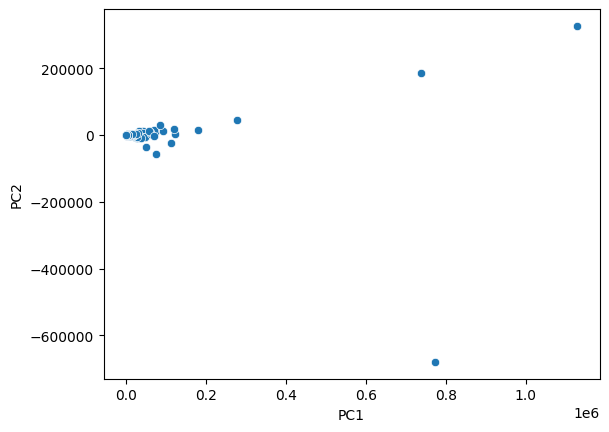

In [530]:
# PLOT PCs HERE
sns.scatterplot(x=df_PCs['PC1'], y=df_PCs['PC2'])

3. What do you see (qualitatively)? Is there any visible clustering of samples? How are the samples distributed along PC1 and PC2?

*ANSWER HERE*: There's a distinct cluster between 0.0 and 0.2. And the distribution of PC1 and PC2 is mostly on the left side of the graph.

4. Now that we have principal components, we want to understand how much of the variance in the data is explained by each PC. This will help us understand what each PC represents. Create a plot of variance explained by the first 10 principal components. Comment on any trends you see.

   We want a plot that looks like this (with different numbers):

   <img src="./pve.png" alt="pve" width="300"/>

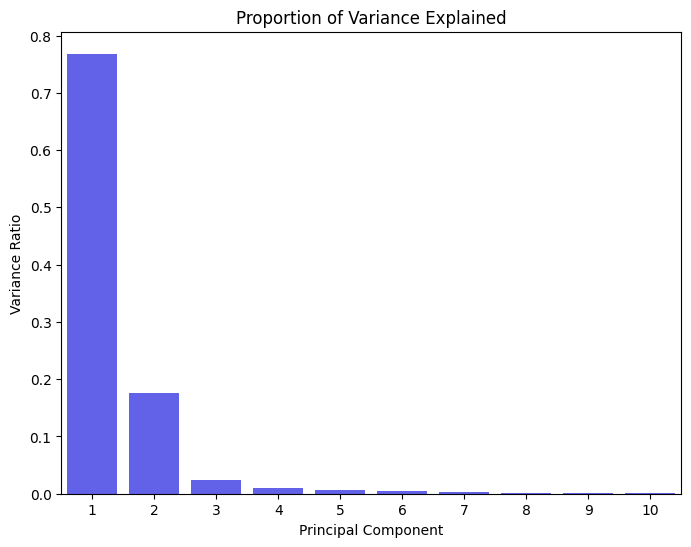

In [531]:
# PLOT PVE HERE
import matplotlib.pyplot as plt

num_pcs = 10  # Number of PCs

plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, num_pcs + 1)), y= PVE[:num_pcs], color='blue', alpha=0.7)

plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Proportion of Variance Explained")

plt.show()

*ANSWER HERE*: The trend of the variance ratio has a huge drop after the first two component then decrease gradually, also the highest ratio hapapens in the first component.

5. Lets investigate what seems to be driving PC1 and PC2. Which genes are most highly associated with the first 4 principal components? The loadings for genes are in the `U` variable from `our_pca()` function. We want four plots that look like this:
   
   <img src="./loadings.png" alt="load" width="300"/>

In [532]:
U

array([[-4.75711004e-04, -1.84097155e-05,  9.02470419e-04, ...,
        -4.35198413e-04,  7.05249794e-04, -1.32392954e-04],
       [-4.77071925e-04, -1.76290846e-05,  9.08851860e-04, ...,
        -5.89096685e-05,  7.33081959e-04, -1.15663536e-04],
       [-3.82831419e-04, -2.79737869e-05,  5.52778416e-04, ...,
        -4.78502191e-04,  8.53110474e-04, -1.06775432e-03],
       ...,
       [ 2.03552772e-03,  4.75951656e-04, -2.92705873e-03, ...,
        -3.25402899e-02,  4.86737962e-02, -2.11030556e-02],
       [-4.22399112e-04, -1.19412498e-05,  7.25104140e-04, ...,
         2.04596559e-03, -7.20348582e-04,  1.66625797e-03],
       [-4.60803847e-04, -2.04200842e-05,  8.33279035e-04, ...,
         3.09317252e-04,  7.24949724e-04,  4.52517391e-05]])

In [533]:
num_genes = 6  # Number of top genes to display per PC
num_pcs = 4  # PCs to analyze

U_df = pd.DataFrame(U[:, :num_pcs], index=filter.columns, columns=[f'PC{i+1}' for i in range(num_pcs)]) # df for easier handling
top_genes = {} # Find top genes for each PC
for pc in range(num_pcs):
    top_genes[f'PC{pc+1}'] = U_df.iloc[:, pc].abs().nlargest(num_genes).index.tolist()

# display
for pc, genes in top_genes.items():
    print(f"Top {num_genes} genes for {pc}:")
    print(genes, "\n")

Top 6 genes for PC1:
['S100A8', 'HBB', 'S100A9', 'B2M', 'TMSB4X', 'FTL'] 

Top 6 genes for PC2:
['HBB', 'S100A8', 'S100A9', 'HBA2', 'B2M', 'HBA1'] 

Top 6 genes for PC3:
['B2M', 'S100A8', 'TMSB4X', 'RPS27', 'S100A9', 'IGKC'] 

Top 6 genes for PC4:
['DEFA1B', 'B2M', 'DEFA3', 'IGKC', 'DEFA1', 'S100A9'] 



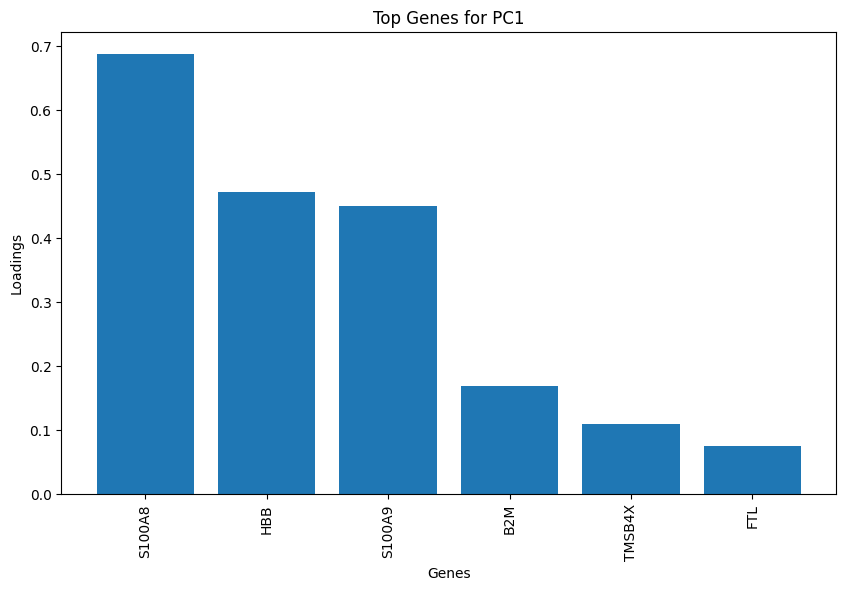

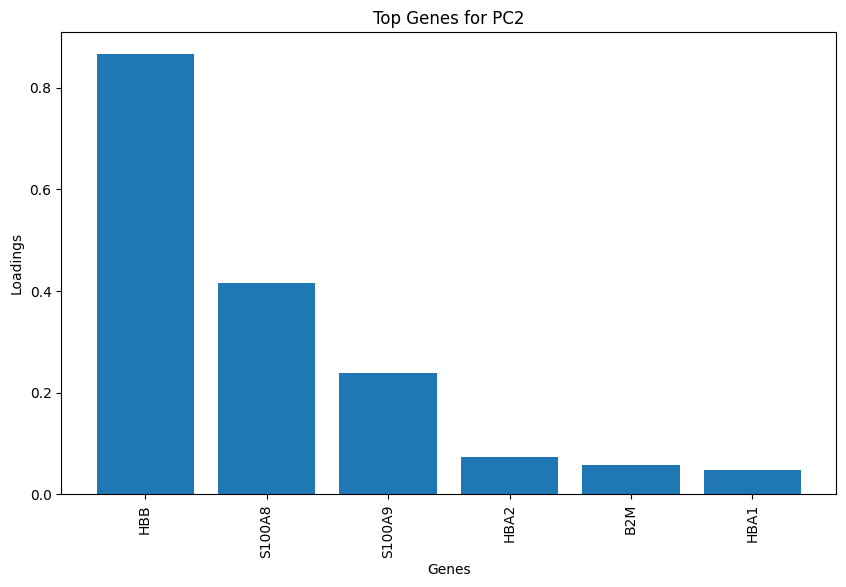

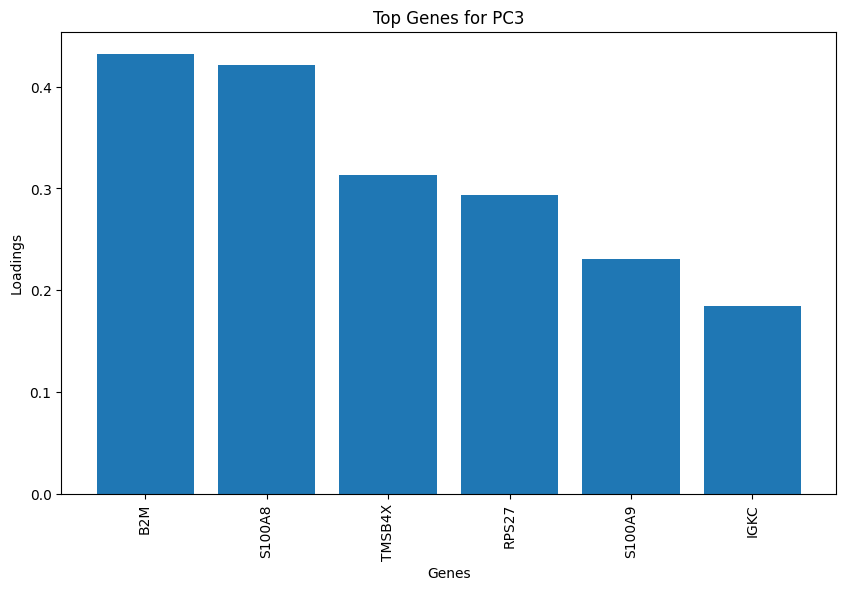

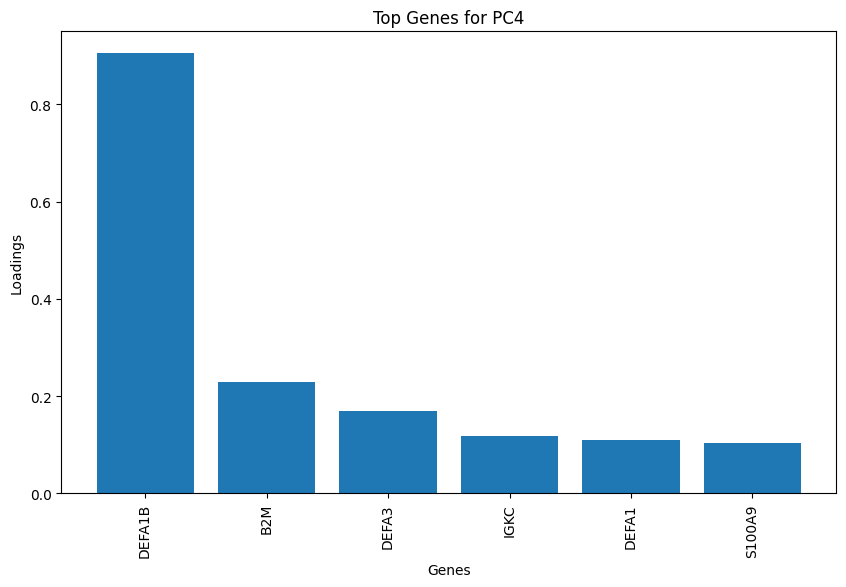

In [534]:
# PLOT LOADINGS HERE
for i in range(4):
    pc = f'PC{i+1}'
    top_genes = U_df[pc].abs().sort_values(ascending=False).head(6)
    
    plt.figure(figsize=(10, 6))
    plt.bar(top_genes.index, top_genes.values)
    plt.title(f'Top Genes for {pc}')
    plt.xlabel('Genes')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    plt.show()

6. There definitiely seems to be one gene that is mostly driving PC1. What gene is it? What is this gene? What is its role? What types of cells tend to express this gene.

*ANSWER HERE*: Gene 'S100A8' is the most driving gene in PC1. It encodes a protein that regulates inflammation and the immune response. Myeloid Cells, epithelial and endothelial Cells.

7. Recall that these samples are from plasma and leukocyte samples from patients. Knowing this, why do you think that this gene has such a high influence on our PCs? Why is this not something we want?

*ANSWER HERE*: It is highly expressed in Leukocytes and it stands an important part in inflammation. The reason of it isn't something we want is because it may overshadow other genes that are more relevant. 

8. Because PC1 is primarily driven by this unwanted observation, and does not appear to contain information on the biology we're after, generate a data matrix with PC1 removed.

   One way to do this is to first, take the formulation of the singular value decomposition X = UDV<sup>T</sup>. Now, compute X again where you set the singular value for PC1 to zero. In other words, set the first (and largest) value in D to zero and recompute the product. (D can also be notated as sigma)

   Another way to do this is to look at the function from class. This function returns U and DV<sup>T</sup> (DV<sup>T</sup> is named PCs in the function). So, remove the first column in U, and the first row in DV<sup>T</sup>. Then compute the product.

   At the end of this, you should have a representation of the data with PC1 removed.

In [535]:
# REMOVE PC1 HERE
filter_noPC1 = filter.copy()
U, D, Vt = np.linalg.svd(filter_noPC1, full_matrices=False)
D[0] = 0 # Set the first singular value for PC1 to zero
filter_noPC1 = np.dot(U * D, Vt) 


In [536]:
filter_noPC1

array([[ 3.04282488e-01,  1.45594805e-01,  1.04558289e+01, ...,
         1.39104453e+02,  1.42326796e+01,  4.53525875e+00],
       [ 9.00858200e-02,  7.06715261e-02,  9.56880840e+00, ...,
         1.58778604e+02,  1.04052596e+01,  2.48946849e+00],
       [-1.00032320e-02, -6.36347389e-02,  1.54446379e+00, ...,
         1.04827539e+02,  6.77193443e+00, -3.92188853e-01],
       ...,
       [ 6.05676049e-01,  2.19949727e-01,  2.06723617e+01, ...,
         2.63619536e+02,  6.50313193e+00,  2.81287114e+00],
       [ 2.63431276e+00, -1.74588743e-02,  1.40887186e+01, ...,
         1.69903431e+02, -2.57481355e+00, -3.91371231e-01],
       [-3.91776769e-01,  6.78412136e-02, -2.23420410e+01, ...,
        -1.60442948e+02, -1.41841526e+01, -4.71974762e+00]])

9. Regenerate your scatterplot of PC1 and PC2, your proportion variance explained plot, and your gene loadings for the first 4 PCs. Has anything changed? What are the functions of the new most influential genes? Why is this better than before?

<Axes: xlabel='PC1', ylabel='PC2'>

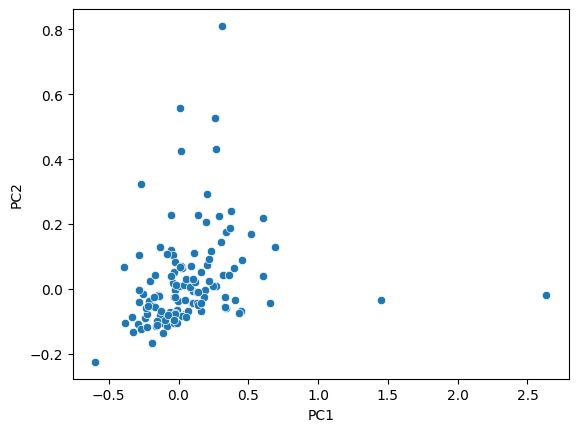

In [537]:
# PLOT HERE
filter_noPC1_df = pd.DataFrame(filter_noPC1)
filter_noPC1_df.columns = ['PC%d'%(i+1) for i in range(filter_noPC1_df.shape[1])]
sns.scatterplot(x=filter_noPC1_df['PC1'], y=filter_noPC1_df['PC2'])


In [538]:
PCs, Vt, PVE, U = our_pca(filter_noPC1_df.T)

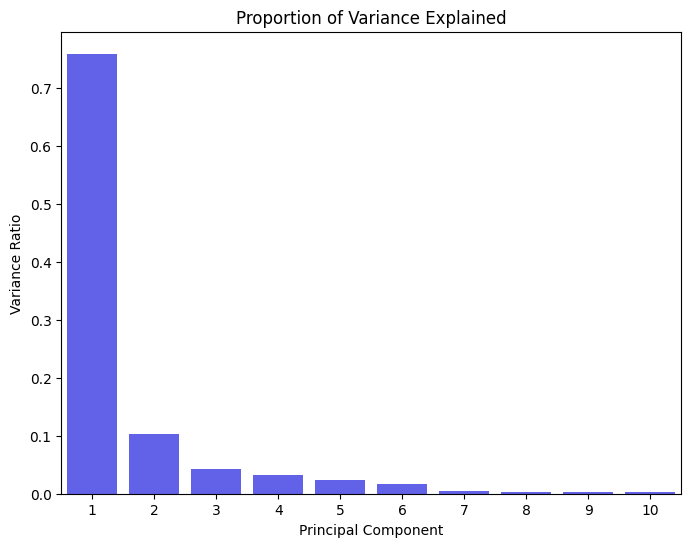

In [539]:
import matplotlib.pyplot as plt

num_pcs = 10

plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, num_pcs + 1)), y= PVE[:num_pcs], color='blue', alpha=0.7)

plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Proportion of Variance Explained")

plt.show()

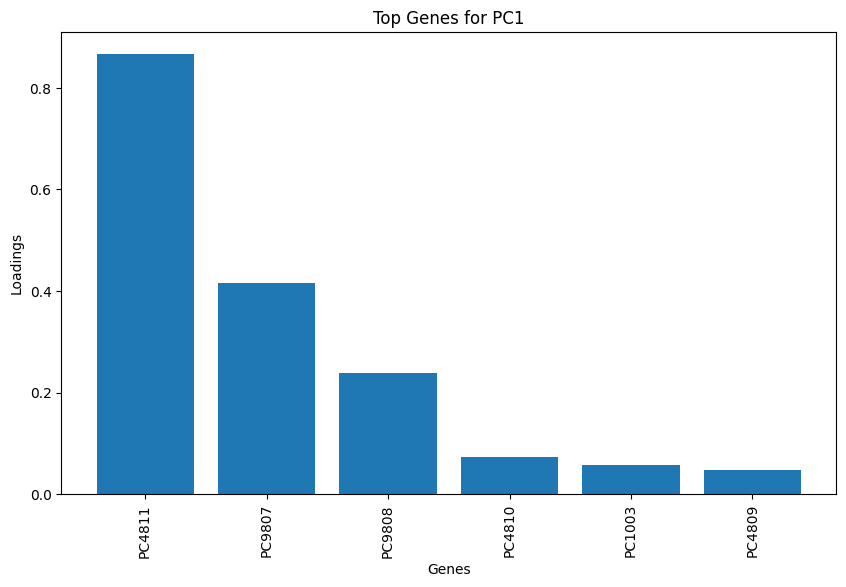

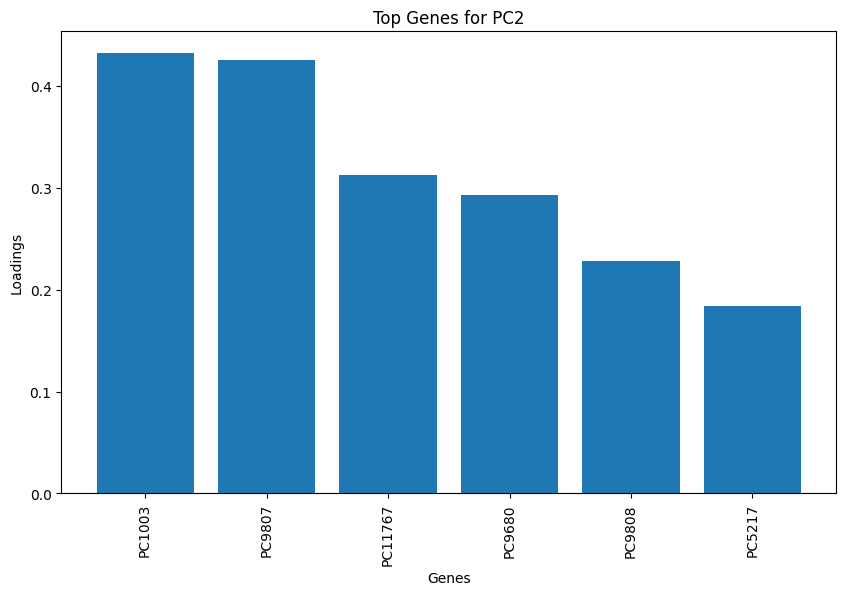

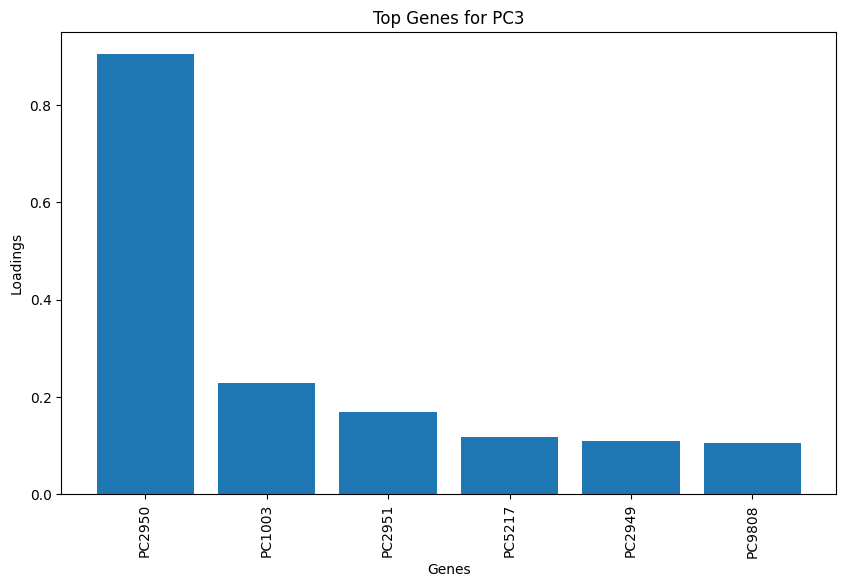

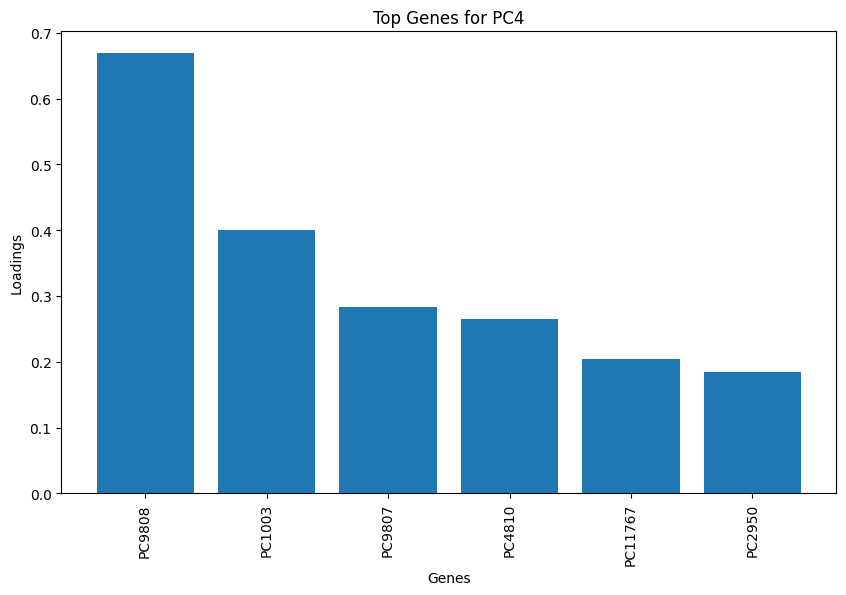

In [540]:
num_genes = 6 
num_pcs = 4 

U_df = pd.DataFrame(U[:, :num_pcs], index=filter_noPC1_df.columns, columns=[f'PC{i+1}' for i in range(num_pcs)])
top_genes = {} 
for pc in range(num_pcs):
    top_genes[f'PC{pc+1}'] = U_df.iloc[:, pc].abs().nlargest(num_genes).index.tolist()

# PLOT LOADINGS HERE
for i in range(4):
    pc = f'PC{i+1}'
    top_genes = U_df[pc].abs().sort_values(ascending=False).head(6)
    
    plt.figure(figsize=(10, 6))
    plt.bar(top_genes.index, top_genes.values)
    plt.title(f'Top Genes for {pc}')
    plt.xlabel('Genes')
    plt.ylabel('Loadings')
    plt.xticks(rotation=90)
    plt.show()

*ANSWER HERE*: The cluster is more seperated than the previous one and the most driven gene in PC1 has changed to PC4811, which is better because it shows more relevant infomation.

#### c) Plotting over features

1. Let's investigate how the various metadata traits cluster on the PC1 vs PC2 plot. Color the samples in the plot by various metadata traits (covid, hospital room, etc.). Play around with each trait, and generate 2-3 plots.

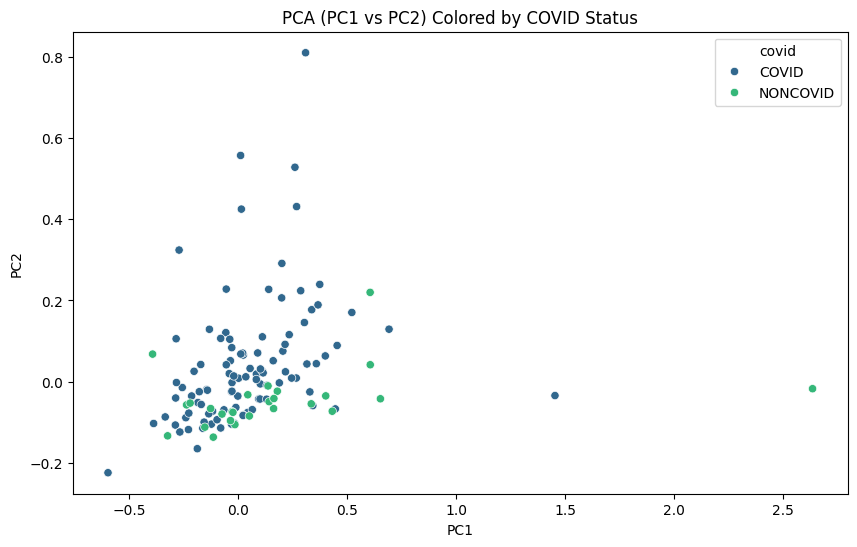

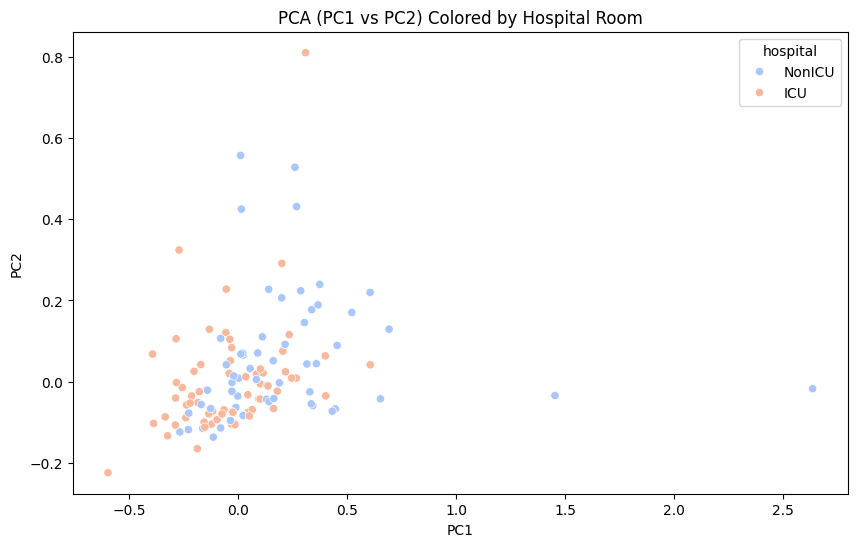

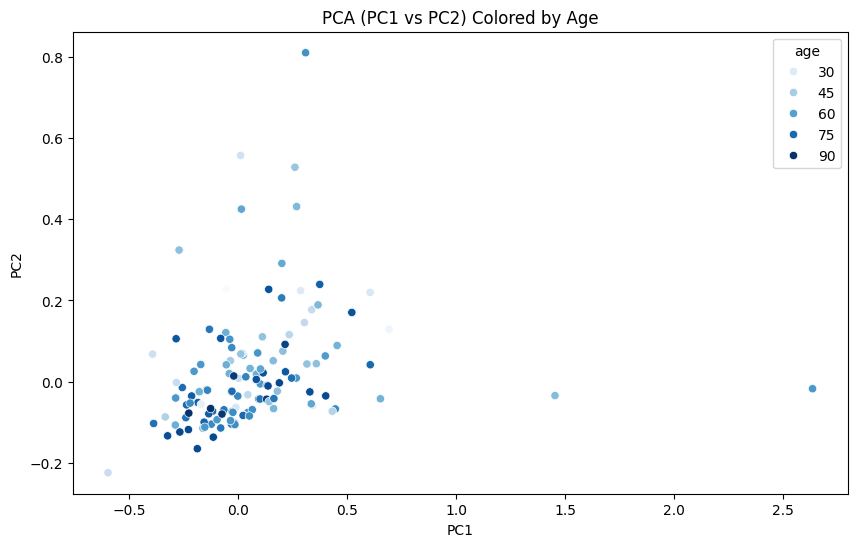

In [541]:
# PLOT HERE

metadata = metadata.reset_index(drop=True)

metadata['PC1'] = filter_noPC1_df['PC1'] 
metadata['PC2'] = filter_noPC1_df['PC2']

# PC1 vs PC2 colored by 'covid' status
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metadata['PC1'], y=metadata['PC2'], hue='covid', data=metadata, palette="viridis")
plt.title("PCA (PC1 vs PC2) Colored by COVID Status")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PC1 vs PC2 colored by 'hospital'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metadata['PC1'], y=metadata['PC2'], hue='hospital', data=metadata, palette="coolwarm")
plt.title("PCA (PC1 vs PC2) Colored by Hospital Room")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PC1 vs PC2 colored by 'age' 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metadata['PC1'], y=metadata['PC2'], hue='age', data=metadata, palette="Blues")
plt.title("PCA (PC1 vs PC2) Colored by Age")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



2. Do you see any trends in the PCA plots you generated?

*ANSWER HERE*: From the graph we could see that the cluster are moslty gatherd in the botton left corner of the plot. And sample who has covid status and a older age has a relative higher proportion. 

3. Look at multiple PC's beyond PCs 1 and 2. Investigate PC's 3 and 4. Do you see any trends in these plots? What does this mean for the variation explained by these PCs?

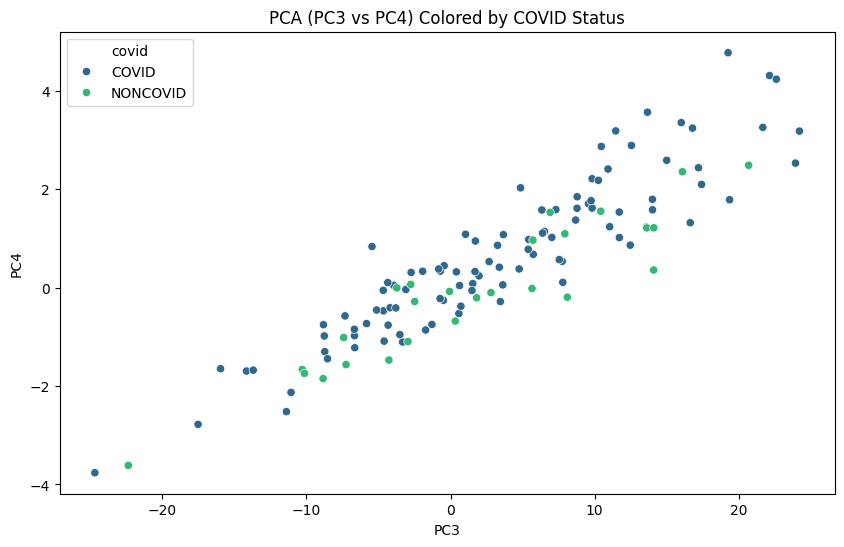

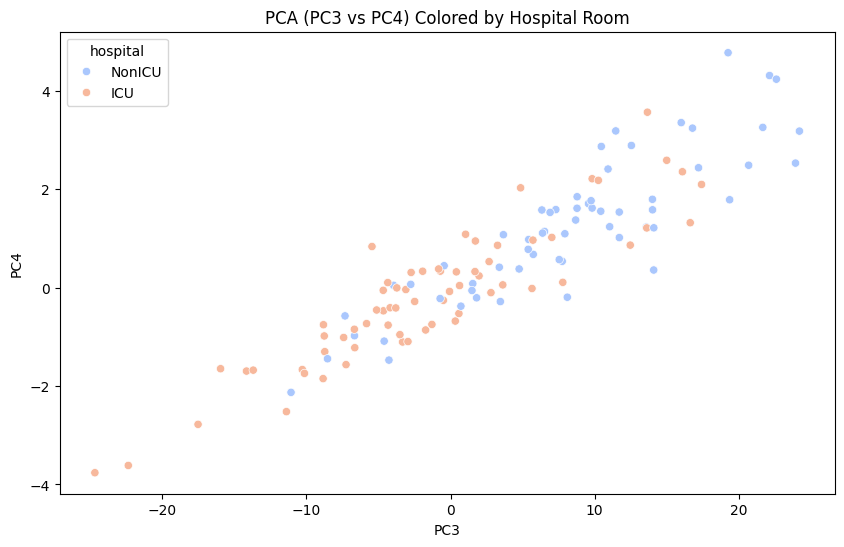

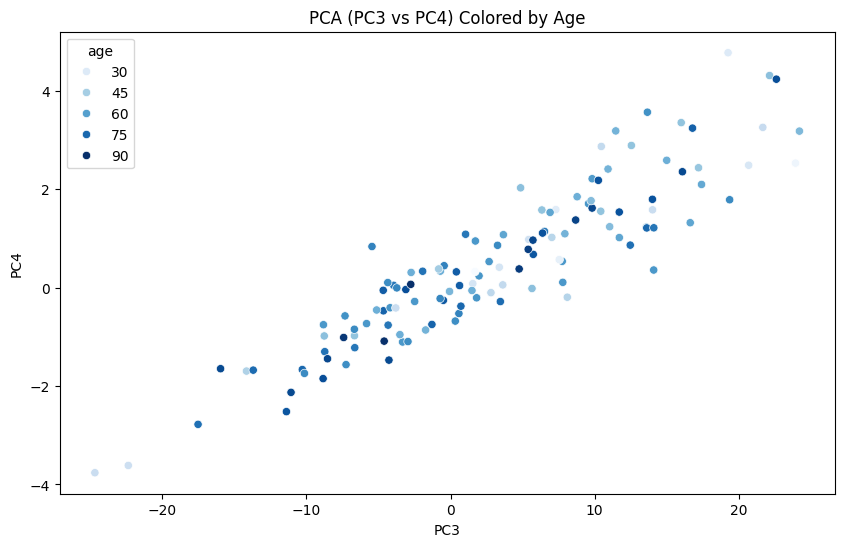

In [542]:
# PLOT HERE
import seaborn as sns
import matplotlib.pyplot as plt

metadata = metadata.reset_index(drop=True)

metadata['PC3'] = filter_noPC1_df['PC3'] 
metadata['PC4'] = filter_noPC1_df['PC4']

# PC1 vs PC2 colored by 'covid' status
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metadata['PC3'], y=metadata['PC4'], hue='covid', data=metadata, palette="viridis")
plt.title("PCA (PC3 vs PC4) Colored by COVID Status")
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

# PC1 vs PC2 colored by 'hospital'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metadata['PC3'], y=metadata['PC4'], hue='hospital', data=metadata, palette="coolwarm")
plt.title("PCA (PC3 vs PC4) Colored by Hospital Room")
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

# PC1 vs PC2 colored by 'age' 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=metadata['PC3'], y=metadata['PC4'], hue='age', data=metadata, palette="Blues")
plt.title("PCA (PC3 vs PC4) Colored by Age")
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

*ANSWER HERE*: It is more seperate cluster and the plot change from a relatively gathering distribution to a more linear distribution, with the trend start from left buttom corner to upper right. This means the two elements are positively correlated. This means variation is low between the two samples.

## 3: Other EDA

Ok cool. We were able to use PCA to identify directions of maximal variation in the data and use these to clean the data and find associations with genes and metadata information. Let's take a deeper look at certain aspects of the data.

#### a) Let's explore relationships between the metadata traits

1. Investigate the relationship between age and hospital status for patients with covid. Plot this relationship using histograms. Are certain ages more associated with ICU admittance than others?

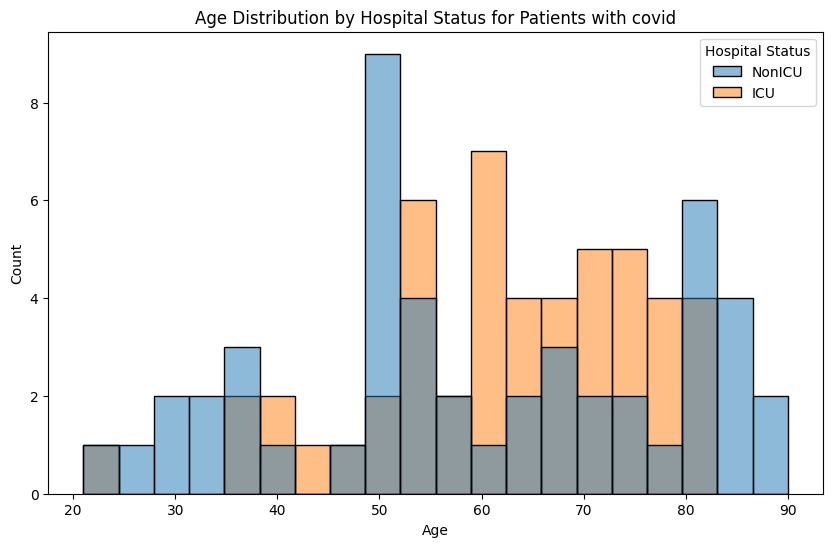

In [543]:
# PLOTS HERE
covid_patients = metadata[metadata['covid'] == 'COVID']

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=covid_patients, x='age', hue='hospital', bins=20)
plt.title('Age Distribution by Hospital Status for Patients with covid')
plt.xlabel('Age')
plt.ylabel('Count')
sns.move_legend(ax, loc="upper right", title='Hospital Status')
plt.show()


*ANSWER HERE*: As the plot shows, age in 60's are more associated with ICU admittance than others.

#### b) Genes of interest

1. In the paper, the authors highlight CD24 as a gene that is relevant. Plot the distribution of CD24 expression across the metadata traits (covid, hospital, sex, etc.). Do you see anything notable? What does CD24 do, and how could that be related to your observations?

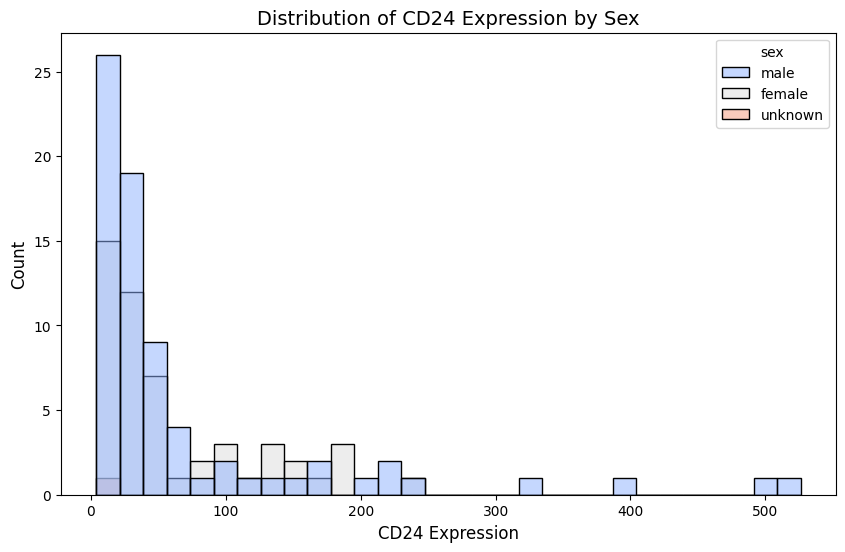

In [544]:
# PLOTS HERE
metadata['CD24_expression'] = filter['CD24'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
ax=sns.histplot(data=metadata, x='CD24_expression', hue='sex', bins=30, palette='coolwarm')

plt.title('Distribution of CD24 Expression by Sex', fontsize=14)
plt.xlabel('CD24 Expression', fontsize=12)
plt.ylabel('Count', fontsize=12)
sns.move_legend(ax, loc="upper right", title='sex')
plt.show()


*ANSWER HERE*: The expression are highly showed in male, and it only showed in female in the expression below 200.

#### c) Bootstrapping and Multiple Hypothesis Testing

1. The paper also identified LCN2 as a gene that is differentially expressed in COVID patients. LCN2 is an protein involved in innate immune response. We want to see if expression of this gene changes based on covid status. To start, plot LCN2 expression vs covid status.

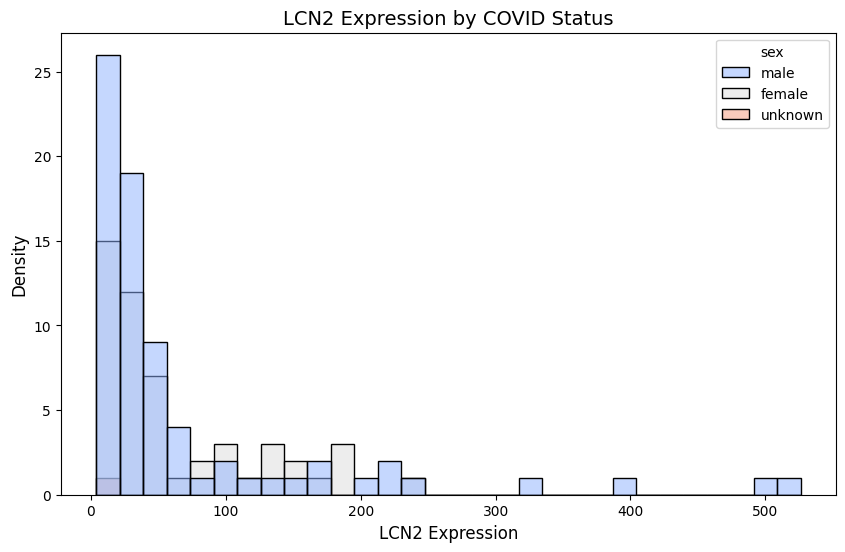

In [545]:
# PLOTS HERE
metadata['LCN2_expression'] = filter['LCN2'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
ax=sns.histplot(data=metadata, x='CD24_expression', hue='sex', bins=30, palette='coolwarm')

plt.title('LCN2 Expression by COVID Status', fontsize=14)
plt.xlabel('LCN2 Expression', fontsize=12)
plt.ylabel('Density', fontsize=12)
sns.move_legend(ax, loc="upper right", title='sex')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_32644\157399661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metadata, x='covid', y='LCN2_expression', palette='coolwarm')


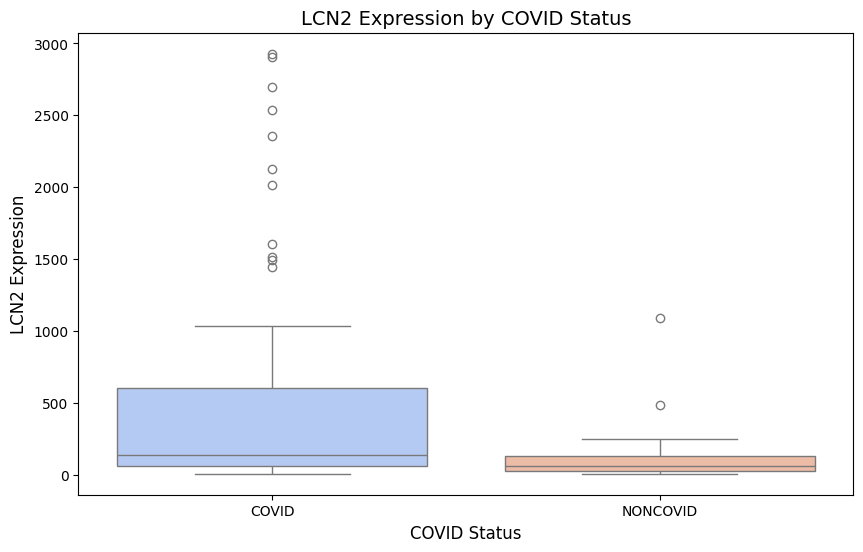

In [546]:
# PLOT HERE
metadata['LCN2_expression'] = filter['LCN2'].reset_index(drop=True)

plt.figure(figsize=(10, 6))

sns.boxplot(data=metadata, x='covid', y='LCN2_expression', palette='coolwarm')
plt.title('LCN2 Expression by COVID Status', fontsize=14)
plt.xlabel('COVID Status', fontsize=12)
plt.ylabel('LCN2 Expression', fontsize=12)
plt.show()


2. These two distributions look pretty different. But we want to see if they are actually significantly different or not. Let's do a bootstrap test. First, generate 1000 bootstrap samples of LCN2 expression for covid and noncovid groups by sampling with replacement. Plot the distributions of our bootstrapped sample means.

In [547]:
def bootstrap_means(data, num_samples=1000):
    return [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_samples)]

In [548]:
covid_group = metadata[metadata['covid'] == 'COVID']['LCN2_expression'].dropna()
non_covid_group = metadata[metadata['covid'] != 'COVID']['LCN2_expression'].dropna()

num_bootstrap = 1000

covid_bootstrap_means = bootstrap_means(covid_group, num_bootstrap)
non_covid_bootstrap_means = bootstrap_means(non_covid_group, num_bootstrap)

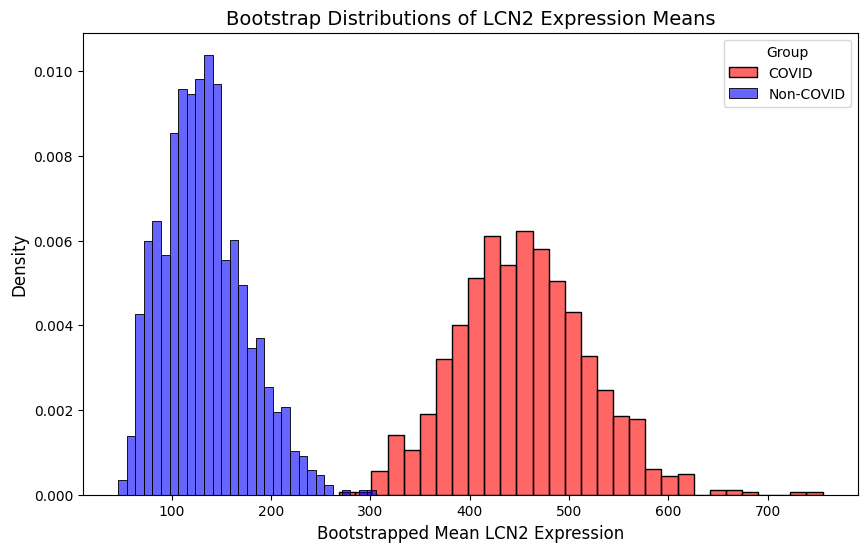

In [549]:
# PLOT HERE
plt.figure(figsize=(10, 6))
sns.histplot(covid_bootstrap_means, bins=30, color='red', label='COVID', stat='density', alpha=0.6)
sns.histplot(non_covid_bootstrap_means, bins=30, color='blue', label='Non-COVID', stat='density', alpha=0.6)
plt.title('Bootstrap Distributions of LCN2 Expression Means', fontsize=14)
plt.xlabel('Bootstrapped Mean LCN2 Expression', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Group')
plt.show()


3. Next, calculate a 95% confidence interval using a test statistic for each sample. Is the expression of CD24 between these groups significantly different? In other words, do their confidence intervals overlap? In addition, calculate p-values by counting the number of times the COVID mean is less than the non-COVID mean.

Use the following formula: `CI = sample mean +/- test_statistic*sample standard deviation`

In [550]:
covid_group_24 = metadata[metadata['covid'] == 'COVID']['CD24_expression'].dropna()
non_covid_group_24 = metadata[metadata['covid'] != 'COVID']['CD24_expression'].dropna()

num_bootstrap = 1000
test_statistic = 1.96  # 95% confidence interval

covid_bootstrap_means_24 = bootstrap_means(covid_group_24, num_bootstrap)
non_covid_bootstrap_means_24 = bootstrap_means(non_covid_group_24, num_bootstrap)

# confidence intervals
covid_mean = np.mean(covid_bootstrap_means)
covid_std = np.std(covid_bootstrap_means)
covid_CI = (covid_mean - test_statistic * covid_std, covid_mean + test_statistic * covid_std)

non_covid_mean = np.mean(non_covid_bootstrap_means)
non_covid_std = np.std(non_covid_bootstrap_means)
non_covid_CI = (non_covid_mean - test_statistic * non_covid_std, non_covid_mean + test_statistic * non_covid_std)

p_value = np.mean(np.array(covid_bootstrap_means) < np.array(non_covid_bootstrap_means))

print(f"COVID CD24 Expression: Mean = {covid_mean:.4f}, 95% CI = {covid_CI}")
print(f"Non-COVID CD24 Expression: Mean = {non_covid_mean:.4f}, 95% CI = {non_covid_CI}")
print(f"P-value = {p_value:.4f}")

COVID CD24 Expression: Mean = 454.1756, 95% CI = (np.float64(323.71550073510485), np.float64(584.6357164648953))
Non-COVID CD24 Expression: Mean = 132.3700, 95% CI = (np.float64(50.851920874943474), np.float64(213.88813758659506))
P-value = 0.0000


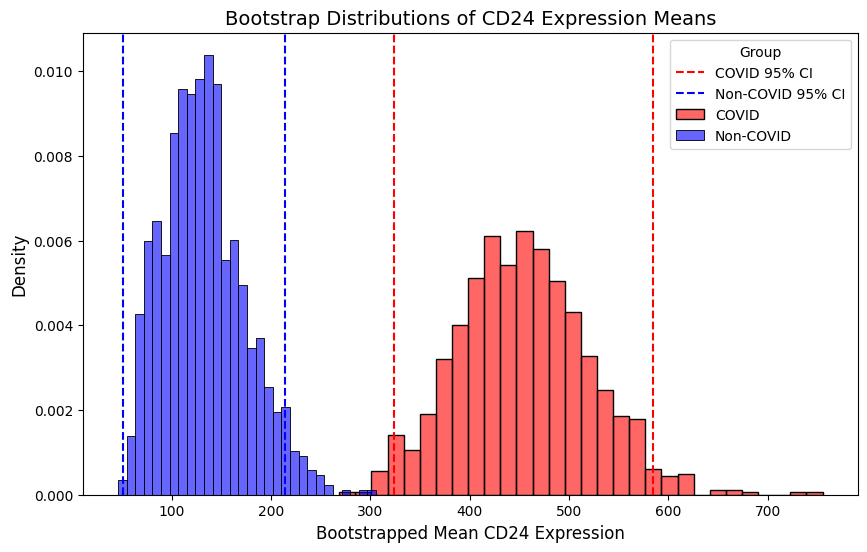

In [551]:
# PLOT HERE
plt.figure(figsize=(10, 6))
sns.histplot(covid_bootstrap_means, bins=30, color='red', label='COVID', stat='density', alpha=0.6)
sns.histplot(non_covid_bootstrap_means, bins=30, color='blue', label='Non-COVID', stat='density', alpha=0.6)

plt.axvline(covid_CI[0], color='red', linestyle='dashed', label='COVID 95% CI')
plt.axvline(covid_CI[1], color='red', linestyle='dashed')
plt.axvline(non_covid_CI[0], color='blue', linestyle='dashed', label='Non-COVID 95% CI')
plt.axvline(non_covid_CI[1], color='blue', linestyle='dashed')

plt.title('Bootstrap Distributions of CD24 Expression Means', fontsize=14)
plt.xlabel('Bootstrapped Mean CD24 Expression', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Group')
plt.show()


*ANSWER HERE*: No, the confidience intervals didn't overlap therefore there is a significant different between these groups. 

4. In addition to CD24 and LCN2, the paper found many genes for which COVID results in increased expression. Let's try to find some of these genes. Perform a bootstrap test like above for the 200 genes below and find their p-values.

In [552]:
# Use the following genes for your bootstrap test
genes = np.array(['WDR33', 'ARHGAP9', 'GASK1B', 'RNF182', 'PTPRO', 'HIVEP2', 'ENOX1','TIPIN', 'R3HDM1', 'ZBTB3', 'METTL18', 'C1orf116', 'APOC1','CDHR5', 'GAB3', 'FGFBP3', 'HSBP1', 'HPS3', 'MRPS10', 'CHST11','ACSM6', 'CNTROB', 'CALCOCO2', 'BACH2', 'RAB2A', 'DAPP1', 'DNAH12','MUS81', 'TMED1', 'PM20D2', 'MTMR2', 'PLEKHG2', 'PFKFB1', 'MINDY2','PEX12', 'PRMT2', 'CFAP161', 'WDR19', 'RSPH3', 'MDC1', 'TMEM131L','CPA4', 'C12orf4', 'DNAJC9', 'ASH2L', 'RCE1', 'PPFIA4', 'SORT1','MAFF', 'ODR4', 'SLC29A2', 'IRF7', 'GOLGA6D', 'ACOT9', 'EIF2S1','ASB1', 'RARS2', 'LIPE', 'ASF1A', 'MOCOS', 'NHS', 'RRP15','HNRNPA2B1', 'MPLKIP', 'KIF17', 'FUZ', 'ZNF525', 'ZNF134', 'MAGI3','CEP250', 'CBFB', 'CHI3L1', 'UBXN4', 'FUBP3', 'IL6ST', 'AGPAT5','TACSTD2', 'SGCE', 'GRK4', 'DAZAP1', 'HECTD2', 'MGST2', 'SLC39A1','TUBGCP2', 'CDK4', 'RIMKLA', 'TAPT1', 'PRF1', 'OR2T8', 'FGFR4','TRAIP', 'MAPK9', 'STK3', 'ALG13', 'ITGA8', 'SH2B1', 'ACTR1B','XRCC3', 'MTARC1', 'SCARB1', 'TNNI1', 'LHB', 'HOXB3', 'C1RL','ATE1', 'ZMYND12', 'PAF1', 'PPIB', 'PPTC7', 'OR5K2', 'ZNF296','PTPMT1', 'CHGA', 'SYN3', 'DCUN1D3', 'ZFYVE16', 'PDLIM4', 'PEX11A','VPS45', 'RALGPS2', 'BBS7', 'INHBE', 'NR1H3', 'LDHD', 'GINS2','DGCR2', 'SPIN3', 'ANKS6', 'CASP6', 'MAGEA8', 'CSNK1G2', 'STRBP','IFNK', 'RCC1', 'C17orf80', 'FAM153A', 'TMEM145', 'SUN3','ARHGAP42', 'GRAMD2B', 'KRT15', 'SYNPO', 'GPR179', 'FBXL6','ACTN3', 'RABGGTA', 'SH2D1A', 'EMCN', 'CD38', 'MAGI1', 'LRGUK','ACTG2', 'CAMKV', 'RGS2', 'TRNAU1AP', 'NLRX1', 'RBL2', 'VPS4A','CKS2', 'TENT4B', 'IDO2', 'CASC3', 'METTL8', 'RAB3D', 'CLSPN','C2CD6', 'MRPS24', 'GPM6A', 'CDC37', 'PRSS41', 'FAM151B', 'C7orf31', 'MATN2', 'MARCHF1', 'IGFALS', 'TESC', 'TMC1', 'ZNF784','TAZ', 'NEU1', 'ZNF41', 'RIMBP3B', 'SLC9A5', 'CBX7', 'GCDH','TMEM18', 'KDR', 'PFDN1', 'KRT38', 'P2RX6', 'TSPAN17', 'ATP6V0B','EPX', 'HLF', 'RRP1', 'SLC16A2', 'GJA1', 'NUPR1', 'USP8', 'CEP128'])

In [553]:
# CODE HERE
num_bootstrap = 1000

p_values = {}

# Iterate
for gene in genes:
   if gene in filter.columns:  # Ensure the gene exists in filter
        metadata[f'{gene}_expression'] = filter[gene].reset_index(drop=True)
        #print(metadata[f'{gene}_expression'])
        covid_group_gene = metadata[metadata['covid'] == 'COVID'][f'{gene}_expression'].dropna()
        non_covid_group_gene = metadata[metadata['covid'] != 'COVID'][f'{gene}_expression'].dropna()
        covid_bootstrap_means_gene = bootstrap_means(covid_group_gene, num_bootstrap)
        non_covid_bootstrap_means_gene = bootstrap_means(non_covid_group_gene, num_bootstrap)
        
        # proportion where COVID mean < non-COVID mean
        p_value_gene = np.mean(np.array(covid_bootstrap_means_gene) < np.array(non_covid_bootstrap_means_gene))
        p_values[gene] = p_value_gene

p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])
print(p_values_df.head(20))


C:\Users\user\AppData\Local\Temp\ipykernel_32644\1243955646.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata[f'{gene}_expression'] = filter[gene].reset_index(drop=True)
C:\Users\user\AppData\Local\Temp\ipykernel_32644\1243955646.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata[f'{gene}_expression'] = filter[gene].reset_index(drop=True)
C:\Users\user\AppData\Local\Temp\ipykernel_32644\1243955646.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

          p-value
WDR33       0.000
ARHGAP9     0.245
GASK1B      0.008
PTPRO       0.035
HIVEP2      0.000
TIPIN       0.000
R3HDM1      0.000
ZBTB3       0.000
METTL18     0.006
C1orf116    0.000
GAB3        0.002
FGFBP3      0.559
HSBP1       0.285
HPS3        0.000
MRPS10      0.000
CHST11      0.000
CNTROB      0.003
CALCOCO2    0.000
BACH2       0.056
RAB2A       0.001


5. Use Benjamini Hochberg FDR multiple hypothesis correction to adjust the p-values from the last section for the number of hypothesis tests performed. Without using the correction, with an alpha of 0.05, how many genes were significantly differentially expressed? With the correction, how many genes were significantly differentially expressed?

In [554]:
# CODE HERE
from statsmodels.stats.multitest import multipletests

p_values_df = p_values_df.sort_values(by='p-value') # ascending

num_significant_before = (p_values_df['p-value'] < 0.05).sum() # Count significant genes after correction (alpha = 0.05)
print(f"Significant genes before correction: {num_significant_before}")
# Benjamini-Hochberg FDR correction
p_values_df['adjusted_p'] = multipletests(p_values_df['p-value'], method='fdr_bh')[1]
num_significant_after = (p_values_df['adjusted_p'] < 0.05).sum() 
print(f"Significant genes after correction: {num_significant_after}")
print(p_values_df.head(20))


Significant genes before correction: 99
Significant genes after correction: 96
           p-value  adjusted_p
WDR33          0.0         0.0
R3HDM1         0.0         0.0
TIPIN          0.0         0.0
HIVEP2         0.0         0.0
ZBTB3          0.0         0.0
MRPS10         0.0         0.0
CHST11         0.0         0.0
C1orf116       0.0         0.0
HPS3           0.0         0.0
MINDY2         0.0         0.0
RSPH3          0.0         0.0
CFAP161        0.0         0.0
MTMR2          0.0         0.0
PM20D2         0.0         0.0
DAPP1          0.0         0.0
CALCOCO2       0.0         0.0
NHS            0.0         0.0
HNRNPA2B1      0.0         0.0
MPLKIP         0.0         0.0
MAGI3          0.0         0.0


*ANSWER HERE*: The significant genes before correction is 100, after the correction 96 genes were significantly differentially expressed.

## 4: Future Directions

#### a) After this EDA, what kind of relationships do you think are worth studying in more detail?

*ANSWER HERE*: Relationships of genes and heart attack are worth studying in more detail.

#### b) What kind of data or questions would you want to look into more in the future?

*ANSWER HERE*: I'd like to look into synaptic genes and the relationships between mental health affect.

## The end.